In [1]:
from IPython import display

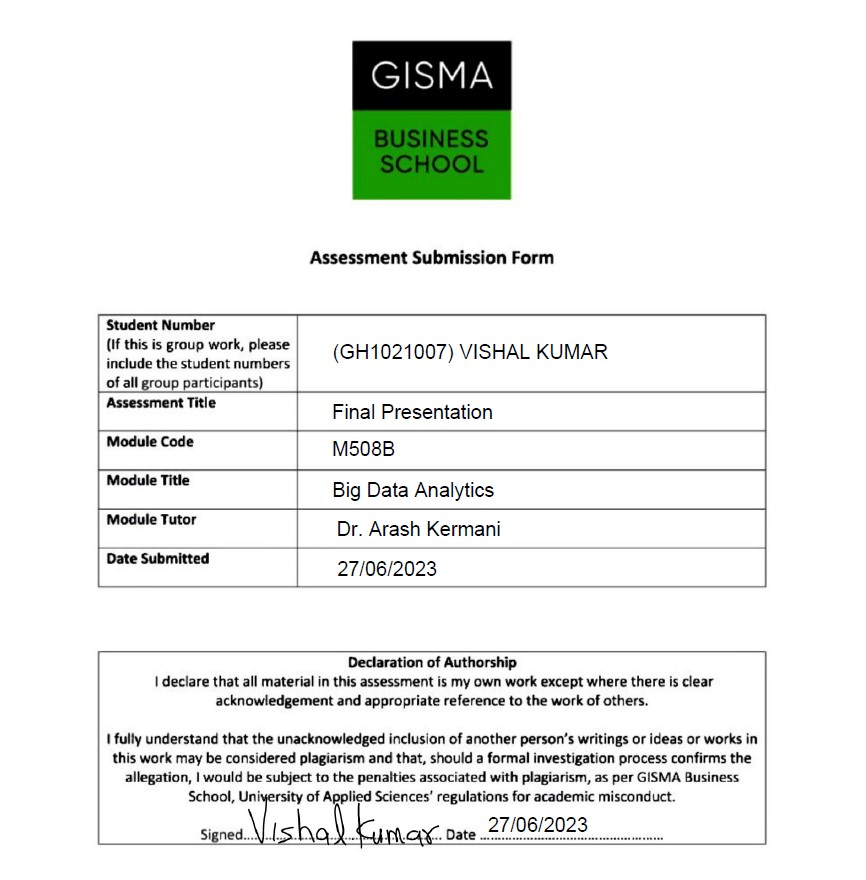

In [2]:
display.Image("/content/Big_Data_Analytics.jpg")

#[0.0.1] Assignment Natural Language Processing (NLP)

A major airline has recruited me as a senior data scientist to devise a pipeline for classifying client sentiment based on tweets. This allows the airline to get real-time feedback and make data-driven conclusions about service upgrades, advertising strategies, and customer relationship management. With the surge in digital communication, understanding customer sentiment is essential for organizations aiming to deliver superior customer service in the highly competitive airline industry.

#[0.0.2] Import libraries and see dataset

Some libraries used  for NLP tasks.

'langdetect' is used for detecting the language of a given text.

'textatistic' calculates readability scores of text documents indicating their difficulty level.

 'spacy' and 'en_core_web_lg' are used for various linguistic tasks like tokenization, POS tagging, named entity recognition etc.,

 'en_core_web_lg' also provides word embeddings for tasks requiring semantic similarity computation.

In [3]:
!pip install langdetect
!pip install textatistic

In [4]:
!python -m spacy download en_core_web_lg


2023-06-29 06:52:20.745516: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 06:52:21.714398: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [5]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

from wordcloud import WordCloud
from textblob import TextBlob
from langdetect import detect_langs
from textatistic import Textatistic
from nltk.tokenize import word_tokenize


from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import xgboost as xgb
from sklearn.impute import SimpleImputer


# Set default settings
sns.set_style('darkgrid')
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

In [6]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#[0.0.2.1] Introduction
We're entrusted with a Sentiment Analysis problem in the field of Natural Language Processing (NLP), planning to group tweets about airlines as 'positive', 'neutral', or 'negative'.

##[0.0.2.2] Problem Statement
Our business problem is understanding client sentiments for airlines based on their tweets. This real-time feedback system can direct assistance upgrades, marketing strategies, and customer relationship management.

##[0.0.2.3] System Design
Our NLP pipeline comprises:

### 1.Data Exploration and Preprocessing:
 Comprehend and clean the dataset.
### 2. Feature Extraction:
Transform raw text for Machine Learning algorithms.
### 3.Model Training:
 Experiment with both traditional Machine Learning and deep learning models.
### 4. Model Evaluation:
Test and look at model performance.
### 5. Inference:
Use trained models to predict the sentiment of new tweets.
### 6.Detailed Design & Implementation
We'll start with traditional feature extraction (Bag of Words, TF-IDF) and ML algorithms (Naive Bayes, SVM). Later, we'll use deep learning models (RNNs, LSTMs, Transformers) which can capture text context better, improving sentiment classification.

### 7. Model training and evaluation:
We'll use accuracy as our key metric. However, precision, recall, and F1-score will be considered too.

### 8.Conclusion
We'll discuss the strengths and limitations of our pipeline, results implications, recommendations, and expected future enhancements. We expect deep learning models to outperform traditional ones, giving valuable customer sentiment insights.

#[0.0.3] Loading Dataset
Let us first load and explore the data

In [8]:
tweets_data_f = pd.read_csv('/content/Airline_Sentiment_2023.csv', index_col = 'tweet_id')
tweets_data_f.head(5)

,index,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,,,,,,,
5.700000e+17,0,681448150,False,finalized,3,2/25/2015 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
5.700000e+17,1,681448153,False,finalized,3,2/25/2015 1:53,positive,0.3466,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
5.700000e+17,2,681448156,False,finalized,3,2/25/2015 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
5.700000e+17,3,681448158,False,finalized,3,2/25/2015 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
5.700000e+17,4,681448159,False,finalized,3,2/25/2015 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


# System Design
## Data Exploration and Preprocessing (Dataset features)

In [9]:
tweets_data_f.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 14640 entries, 5.7e+17 to 5.7e+17
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         14640 non-null  int64  
 1   _unit_id                      14640 non-null  int64  
 2   _golden                       14640 non-null  bool   
 3   _unit_state                   14640 non-null  object 
 4   _trusted_judgments            14640 non-null  int64  
 5   _last_judgment_at             14584 non-null  object 
 6   airline_sentiment             14640 non-null  object 
 7   airline_sentiment:confidence  14640 non-null  float64
 8   negativereason                9178 non-null   object 
 9   negativereason:confidence     10522 non-null  float64
 10  airline                       14640 non-null  object 
 11  airline_sentiment_gold        40 non-null     object 
 12  name                          14640 non-null  obje

## Extracting features that we will utilize

In [10]:
tweets_data_f = tweets_data_f[['tweet_created','text','airline_sentiment']]
tweets_data_f

,tweet_created,text,airline_sentiment
tweet_id,,,
5.700000e+17,2/24/2015 11:35,@VirginAmerica What @dhepburn said.,neutral
5.700000e+17,2/24/2015 11:15,@VirginAmerica plus you've added commercials t...,positive
5.700000e+17,2/24/2015 11:15,@VirginAmerica I didn't today... Must mean I n...,neutral
5.700000e+17,2/24/2015 11:15,@VirginAmerica it's really aggressive to blast...,negative
5.700000e+17,2/24/2015 11:14,@VirginAmerica and it's a really big bad thing...,negative
...,...,...,...
5.700000e+17,2/22/2015 12:01,@AmericanAir thank you we got on a different f...,positive
5.700000e+17,2/22/2015 11:59,@AmericanAir leaving over 20 minutes Late Flig...,negative
5.700000e+17,2/22/2015 11:59,@AmericanAir Please bring American Airlines to...,neutral


#[0.0.4] Unmistakable Investigation
## Term of tweets
The tweets were sent between 16th Feb 2015 and to 24th Feb 2015

In [11]:
tweets_data_f['tweet_created'] = pd.to_datetime(tweets_data_f.tweet_created, format = '%m/%d/%Y %H:%M')


In [12]:
tweets_data_f['tweet_created'] = pd.to_datetime(tweets_data_f.tweet_created, format = '%m/%d/%y %H:%M')
tweets_data_f.tweet_created.agg(['max','min'])

max   2015-02-24 11:53:00
min   2015-02-16 23:36:00
Name: tweet_created, dtype: datetime64[ns]

## The extremity of the tweets
The tweets have been pre-characterized into various emotions. Among the tweets, 62.7% are sorted as negative, demonstrating a dominatingly negative sentiment, while 16.1% are named good, proposing a more modest extent of good opinions. Furthermore, 21.2% of the tweets are sorted as nonpartisan, addressing an unbiased close-to-home tone. These pre-allocated emotion classes will act as the component against which we will assess the exactness of our predictions.

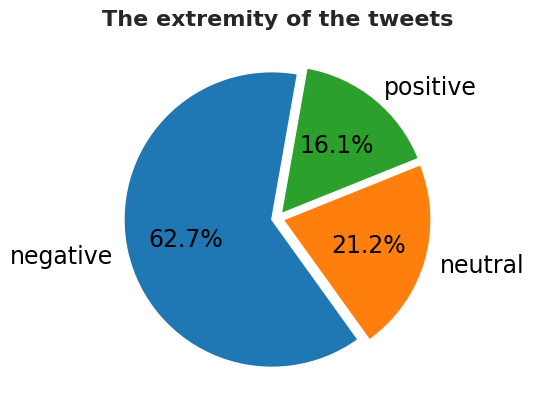

In [13]:
#fig = plt.figure(figsize = (15,8))
tweets_data_f.airline_sentiment.value_counts().plot(kind = 'pie', label ='', autopct ='%1.1f%%', explode = [0.04,0.04,0.04],textprops = {'fontsize':17, 'color':'k'}, startangle = 80)
plt.title('The extremity of the tweets')
plt.show()

#[0.0.5] Preprocessing I

## Feature extraction

Making new features for:
- Number of hashtags
- Number of mentions
- Number of characters
- Number of words

### Number of hashtags in dataset tweet

In [14]:
# Characterize the normal  expression pattern for hashtags
pattern = r'#[a-zA-Z0-9]+'

# Apply the lambda capability to include the quantity of hashtags in every text
hashtags = tweets_data_f.text.apply(lambda x: len(re.findall(pattern, x)))

# Add the 'hashtags' segment to the 'x' DataFrame
tweets_data_f = tweets_data_f.assign(hashtags=hashtags.values)

tweets_data_f.head(5)

,tweet_created,text,airline_sentiment,hashtags
tweet_id,,,,
5.700000e+17,2015-02-24 11:35:00,@VirginAmerica What @dhepburn said.,neutral,0
5.700000e+17,2015-02-24 11:15:00,@VirginAmerica plus you've added commercials t...,positive,0
5.700000e+17,2015-02-24 11:15:00,@VirginAmerica I didn't today... Must mean I n...,neutral,0
5.700000e+17,2015-02-24 11:15:00,@VirginAmerica it's really aggressive to blast...,negative,0
5.700000e+17,2015-02-24 11:14:00,@VirginAmerica and it's a really big bad thing...,negative,0


### Number of mentions in dataset tweet

In [15]:
# Characterize the normal expression pattern for makes reference to
pattern = r'@[a-zA-Z0-9]+'

# Apply the lambda capability to include the quantity of hashtags in every text
mentions = tweets_data_f.text.apply(lambda x: len(re.findall(pattern, x)))

# Add the 'mentions' segment to the 'x' DataFrame
tweets_data_f = tweets_data_f.assign(mentions=mentions.values)

tweets_data_f.head(5)

,tweet_created,text,airline_sentiment,hashtags,mentions
tweet_id,,,,,
5.700000e+17,2015-02-24 11:35:00,@VirginAmerica What @dhepburn said.,neutral,0,2
5.700000e+17,2015-02-24 11:15:00,@VirginAmerica plus you've added commercials t...,positive,0,1
5.700000e+17,2015-02-24 11:15:00,@VirginAmerica I didn't today... Must mean I n...,neutral,0,1
5.700000e+17,2015-02-24 11:15:00,@VirginAmerica it's really aggressive to blast...,negative,0,1
5.700000e+17,2015-02-24 11:14:00,@VirginAmerica and it's a really big bad thing...,negative,0,1


### Number of characters in dataset tweet

In [16]:
# Apply the lambda capability to count the number of characters in every text
no_of_chars = tweets_data_f.text.apply(lambda x: len(x))

# Add the 'no_of_chars' segment to the 'x' DataFrame
tweets_data_f = tweets_data_f.assign(no_of_chars=no_of_chars)

tweets_data_f.head(5)

,tweet_created,text,airline_sentiment,hashtags,mentions,no_of_chars
tweet_id,,,,,,
5.700000e+17,2015-02-24 11:35:00,@VirginAmerica What @dhepburn said.,neutral,0,2,35
5.700000e+17,2015-02-24 11:15:00,@VirginAmerica plus you've added commercials t...,positive,0,1,72
5.700000e+17,2015-02-24 11:15:00,@VirginAmerica I didn't today... Must mean I n...,neutral,0,1,71
5.700000e+17,2015-02-24 11:15:00,@VirginAmerica it's really aggressive to blast...,negative,0,1,126
5.700000e+17,2015-02-24 11:14:00,@VirginAmerica and it's a really big bad thing...,negative,0,1,55


### Number of words in dataset tweet

In [17]:
# Tokenize the text in each tweet to create a rundown of tokens
tokens = [word_tokenize(tweet) for tweet in tweets_data_f.text]

# Count the quantity of alphanumeric tokens in each tokenized tweet
words = [len([token for token in sent if token.isalnum()]) for sent in tokens]

# Add the 'no_of_words' segment to the 'x' DataFrame
tweets_data_f = tweets_data_f.assign(no_of_words=words)

tweets_data_f.head(5)

,tweet_created,text,airline_sentiment,hashtags,mentions,no_of_chars,no_of_words
tweet_id,,,,,,,
5.700000e+17,2015-02-24 11:35:00,@VirginAmerica What @dhepburn said.,neutral,0,2,35,4
5.700000e+17,2015-02-24 11:15:00,@VirginAmerica plus you've added commercials t...,positive,0,1,72,9
5.700000e+17,2015-02-24 11:15:00,@VirginAmerica I didn't today... Must mean I n...,neutral,0,1,71,12
5.700000e+17,2015-02-24 11:15:00,@VirginAmerica it's really aggressive to blast...,negative,0,1,126,17
5.700000e+17,2015-02-24 11:14:00,@VirginAmerica and it's a really big bad thing...,negative,0,1,55,10


## Extracting the airline name
####We have tweets to six significant airlines.
####Perceive text starting with the @ sign

In [18]:
pattern = r'@[a-zA-Z0-9]+'
tweets_data_f['airline_extracted'] = tweets_data_f.text.apply(lambda x: re.findall(pattern, x))

tweets_data_f['airline_extracted'] = [item[0].lower() for item in tweets_data_f.airline_extracted]

tweets_data_f['airline_extracted'] = tweets_data_f['airline_extracted'].apply(lambda x: re.sub("@", '',str(x)))

tweets_data_f['airline_extracted'].value_counts()

united             3817
usairways          2905
americanair        2754
southwestair       2417
jetblue            2215
virginamerica       504
deltaassist           2
nrhodes85             2
ods1819               1
chasefoster           1
sb5551                1
albertbreer           1
djevolutionhd         1
andrewfallis          1
sarahpompei           1
timbennettg3          1
malhoit               1
scm1133               1
ninadavuluri          1
shannonwoodward       1
nytimes               1
eatgregeat            1
catfoodbeerglue       1
hillaconlin           1
internjohnradio       1
kciairport            1
imaginedragons        1
dadboner              1
melissaafrancis       1
mandarinjourney       1
lindaswc              1
vanessaannz           1
Name: airline_extracted, dtype: int64

### Cleaning aircrafts
We will eliminate tweets not addressed to the six aircrafts.

In [19]:
# Get the overview of exceptional transporters in the 'airplane' part of the 'x' DataFrame
not_airline = tweets_data_f['airline_extracted'].value_counts().index.tolist()

# Repeat over a once-over of express transporters to dispense with them from the 'not_airline' list
for airline in ['united', 'americanair', 'usairways', 'southwestair', 'jetblue', 'virginamerica']:
    not_airline.remove(airline)


In [20]:
print('Number of rows before =',tweets_data_f.shape[0])

# Repeat over a summary of unequivocal transporters to eliminate them from the 'not_airline' list
tweets_data_f.loc[tweets_data_f['airline_extracted'].isin(not_airline), 'airline_extracted'] = np.nan

# Drop lines with missing characteristics in the 'airline' section
tweets_data_f.dropna(subset=['airline_extracted'], inplace=True)

print('Number of rows after =',tweets_data_f.shape[0])

Number of rows before = 14640
Number of rows after = 14612


#[0.0.6] Tokenization/lemmatization

In [21]:
nlp = spacy.load('en_core_web_lg')

### Characterize the function for tokenization and lemmatization

In [22]:
def spacy_token(text):

    doc = nlp(text)

    tokens = [token.lemma_ for token in doc]

    return tokens

###Apply the spacy_token capacity to the tweets section


In [23]:
text_tokens = tweets_data_f.text.apply(spacy_token)
text_tokens

tweet_id
5.700000e+17            [@VirginAmerica, what, @dhepburn, say, .]
5.700000e+17    [@VirginAmerica, plus, you, 've, add, commerci...
5.700000e+17    [@virginamerica, I, do, not, today, ..., must,...
5.700000e+17    [@VirginAmerica, it, be, really, aggressive, t...
5.700000e+17    [@VirginAmerica, and, it, be, a, really, big, ...
                                      ...                        
5.700000e+17    [@americanair, thank, you, we, get, on, a, dif...
5.700000e+17    [@americanair, leave, over, 20, minute, Late, ...
5.700000e+17    [@americanair, please, bring, American, Airlin...
5.700000e+17    [@americanair, you, have, my, money, ,, you, c...
5.700000e+17    [@americanair, we, have, 8, ppl, so, we, need,...
Name: text, Length: 14612, dtype: object

## Remove punctuations
#### Emphasize over each line in the text_tokens DataFrame

In [24]:
for i in range(len(text_tokens)):

    text_no_punct = [token for token in text_tokens.iloc[i] if token.isalnum()]

    text_tokens.iloc[i] = text_no_punct

text_tokens

tweet_id
5.700000e+17                                          [what, say]
5.700000e+17    [plus, you, add, commercial, to, the, experien...
5.700000e+17    [I, do, not, today, must, mean, I, need, to, t...
5.700000e+17    [it, be, really, aggressive, to, blast, obnoxi...
5.700000e+17    [and, it, be, a, really, big, bad, thing, abou...
                                      ...                        
5.700000e+17    [thank, you, we, get, on, a, different, flight...
5.700000e+17    [leave, over, 20, minute, Late, Flight, no, wa...
5.700000e+17    [please, bring, American, Airlines, to, blackb...
5.700000e+17    [you, have, my, money, you, change, my, flight...
5.700000e+17    [we, have, 8, ppl, so, we, need, 2, know, how,...
Name: text, Length: 14612, dtype: object

## Removing stopwords
#### Load stop words from spacy module

In [25]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [26]:
for i in range(len(text_tokens)):

    tokens = [token.lower() for token in text_tokens.iloc[i] if token.lower() not in stopwords]

    tokens_joined = " ".join(tokens)

    text_tokens.iloc[i] = tokens_joined

In [27]:
tweets_data_f.text = text_tokens
tweets_data_f

,tweet_created,text,airline_sentiment,hashtags,mentions,no_of_chars,no_of_words,airline_extracted
tweet_id,,,,,,,,
5.700000e+17,2015-02-24 11:35:00,,neutral,0,2,35,4,virginamerica
5.700000e+17,2015-02-24 11:15:00,plus add commercial experience tacky,positive,0,1,72,9,virginamerica
5.700000e+17,2015-02-24 11:15:00,today mean need trip,neutral,0,1,71,12,virginamerica
5.700000e+17,2015-02-24 11:15:00,aggressive blast obnoxious entertainment guest...,negative,0,1,126,17,virginamerica
5.700000e+17,2015-02-24 11:14:00,big bad thing,negative,0,1,55,10,virginamerica
...,...,...,...,...,...,...,...,...
5.700000e+17,2015-02-22 12:01:00,thank different flight chicago,positive,0,1,63,11,americanair
5.700000e+17,2015-02-22 11:59:00,leave 20 minute late flight warning communicat...,negative,0,1,150,23,americanair
5.700000e+17,2015-02-22 11:59:00,bring american airlines blackberry10,neutral,1,1,60,7,americanair


# [0.0.7]Exploratory Data Analysis
### Word cloud
To create our word cloud, we will join every one of the texts from the tweets. We will refresh our stopwords to remember clear words normal for air terminals like flight, fly, plane, air terminal, carrier, etc.

The word cloud created has words, for example, "Thank," "time," "help," "delay," and "cancel" showing up frequently, which uncovers the predominant subjects and feelings in these tweets. The unmistakable quality of "Thank" proposes a high recurrence of appreciation and appreciation communicated towards the carriers. "Time" shows an emphasis on flight timetables and reliability. "Help" demonstrates a common topic of looking for help or backing. The bigger size of "postponement" and "drop" connotes that flight interruptions are usually examined.

In [28]:
text = ''
for i in range(len(text_tokens)):
    text = text + " " + text_tokens.iloc[i]

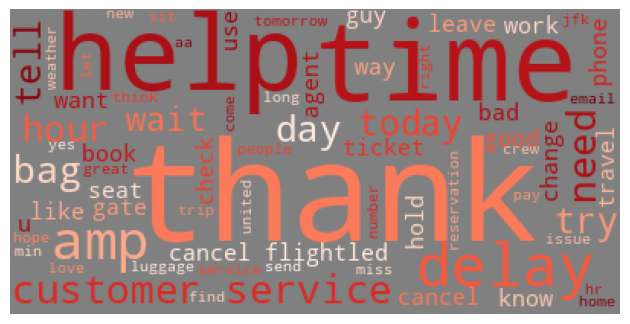

In [29]:
#fig = plt.figure(figsize = (16,10))
cloud = WordCloud(background_color = 'gray', colormap = 'Reds', min_font_size =10, stopwords = ['plane', 'fly','flight','airport','airline', 'flightle']).generate(text)
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

## Visualizing sample tweets
We will visualize test tweets with the words thank, time, delay, drop, help, customer and administration
### Thank
An example of 5 tweets with the word 'thank' has tweets that sound positive and grateful

In [30]:
sample = []
for tweet in tweets_data_f.text.values:
    if 'thank' in tweet:
        sample.append(tweet)
random.seed(986)
random.sample(sample, 4)

['let employee know good service kind attitude customer vital kind business thank',
 'talk military baggage fee guide thank',
 'got cover thank',
 'thank la special']

### Time
A sample of five tweets with the word 'time' has greater part grumbling.

In [31]:
sample = []
for tweet in tweets_data_f.text.values:
    if 'time' in tweet:
        sample.append(tweet)
random.seed(986)
random.sample(sample, 4)

['screw flight cae bother flight leave time cancel flight',
 'time exactly leave number work',
 'yea book 10 avalible flight sit 7 time come plane 2nd day work miss hotellive',
 'seriously reason cancel flightled flight long phone wait time guy tremendously understaffed']

### Delay
These are tweets about clients examining delays by the aircraft

In [32]:
sample = []
for tweet in tweets_data_f.text.values:
    if 'delay' in tweet:
        sample.append(tweet)
random.seed(986)
random.sample(sample, 4)

['united flight ua3774 delay cancel flightled explanation amp flight norfolk book rent car',
 'want thank guy 27 hour delay flight aa106 jfk staff shortage',
 'sponsor oscar wonder half hour delay oscar',
 'check flight nyc expect delay cancel flightled tuesday']

### Cancel

In [33]:
sample = []
for tweet in tweets_data_f.text.values:
    if 'cancel' in tweet:
        sample.append(tweet)
random.seed(986)
random.sample(sample, 4)

['economy plus seat awful day 2 cancel flighted flight lot planning',
 'thank flight hold cancel flight',
 'thank good stay night dallas new trial detroit atlanta tomorrow assume cancel flightlation',
 'flight ua3774 delay cancel flightled flight norfolk book rent car']

### Help
These are tweets about customers seeking aid.

In [34]:
sample = []
for tweet in tweets_data_f.text.values:
    if 'help' in tweet:
        sample.append(tweet)
random.seed(986)
random.sample(sample, 4)

['thanks helpful understand reduce price seat sell check priority certificate',
 'flight cancel flight need help reflight booking problems',
 'difference cancel flighting reflight booking problems help avoid change fee',
 'father kind offer pay hotel use coupon pay fl help']

## Airlines
The bar outline shows the count of tweets coordinated to various carriers. Joined Carriers got the biggest number of tweets with 3,817, recommending a critical degree of commitment and collaboration on Twitter. US Aviation routes and American Airline followed intimately with 2,905 and 2,754 tweets separately. Southwest Airlines and JetBlue got 2,417 and 2,215 tweets individually. tweets_data_f America had the most minimal number of tweets with 504, recommending generally fewer notices or communications contrasted with different airlines.

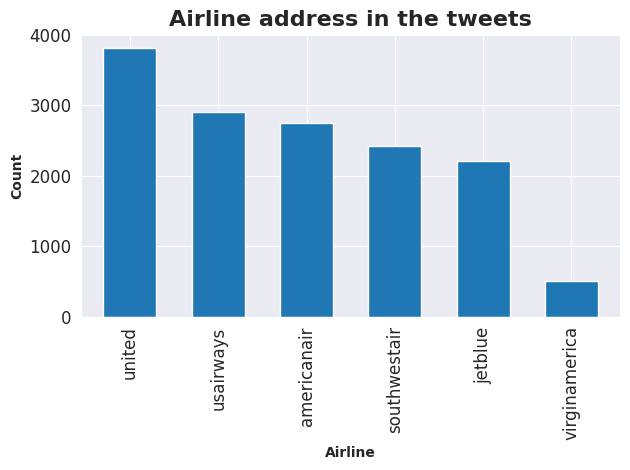

In [35]:
#fig = plt.figure(figsize=(12, 8))

tweets_data_f.airline_extracted.value_counts().plot(kind='bar', width=0.6)

# Set the plot labels
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Airline address in the tweets')

# Change the design of the plot to prevent covering
plt.tight_layout()

# Show the plot
plt.show()


# Detailed Design & Implementation


#[0.0.8] Sentiment Analysis using lexicon method

In [36]:
def lexicon_sentiment(df):
    """ Calculates the opinion of text information in a DataFrame utilizing the TextBlob library."""

    sentiment = []  # List to store the predicted sentiment labels
    sentiment_score = df.text.apply(lambda x: TextBlob(x).sentiment[0])

    # Repeat over every sentiment score and allocate opinion marks in light of edges
    for score in sentiment_score:
        if score < -0.1:
            sentiment.append('negative')
        elif score > 0.1:
            sentiment.append('positive')
        else:
            sentiment.append('neutral')

    df['predicted_sentiment'] = sentiment

lexicon_sentiment(tweets_data_f)

## Conclusion of sentiment analysis using lexicon method
The sentiment characterization expectations can be summed up as follows: just 24% of the tweets were accurately anticipated as pessimistic opinions, while 55% were inaccurately delegated impartial and 20% as good. For the impartial opinion class, 69% of the tweets were accurately anticipated, with 5% misclassified as negative and 24% as certain. Moreover, 57% of the tweets were accurately anticipated as a certain feeling, however, 3% were misclassified as pessimistic and 39% as neutral.

This strategy isn't extremely precise in foreseeing the opinion of tweets with a general exactness of 40%.

#### Perform crosstabs

In [37]:
from IPython.display import display

display(pd.crosstab(tweets_data_f['airline_sentiment'], tweets_data_f['predicted_sentiment'], normalize = 'index'))


predicted_sentiment,negative,neutral,positive
airline_sentiment,,,
negative,0.250709,0.551408,0.197883
neutral,0.057910,0.699450,0.242640
positive,0.033913,0.387028,0.579059


In [38]:
print(classification_report(tweets_data_f['airline_sentiment'], tweets_data_f['predicted_sentiment']))

              precision    recall  f1-score   support

    negative       0.90      0.25      0.39      9162
     neutral       0.27      0.70      0.39      3091
    positive       0.35      0.58      0.43      2359

    accuracy                           0.40     14612
   macro avg       0.50      0.51      0.40     14612
weighted avg       0.68      0.40      0.40     14612



In [39]:
accuracy = (np.sum(tweets_data_f['airline_sentiment'] == tweets_data_f['predicted_sentiment']))/len(tweets_data_f['airline_sentiment'])
print(accuracy)

0.39864494935669315


#[0.0.9] Preprocessing II
## Choosing data types

In [40]:
# Characterize a rundown of section names addressing numeric features
columns_num = tweets_data_f.select_dtypes(include = ['int','float']).columns
columns_cat = ['airline_extracted']

# Create Y and convert it to numeric
Y = tweets_data_f.airline_sentiment
Y = Y.replace({'negative':1, 'neutral':0, 'positive':2})
Y

tweet_id
5.700000e+17    0
5.700000e+17    2
5.700000e+17    0
5.700000e+17    1
5.700000e+17    1
               ..
5.700000e+17    2
5.700000e+17    1
5.700000e+17    0
5.700000e+17    1
5.700000e+17    0
Name: airline_sentiment, Length: 14612, dtype: int64

### Split to train and test dataset

In [41]:
x_train, x_test, Y_train, Y_test = train_test_split(tweets_data_f, Y, random_state = 986, stratify = Y)

In [42]:
print(x_train.shape, Y_train.shape)
print(x_test.shape, Y_test.shape)

(10959, 9) (10959,)
(3653, 9) (3653,)


## Normalize numeric columns

In [43]:
# Create a StandardScaler object
scaler = MinMaxScaler()

# Fit the scaler on the training data and change it
x_train[columns_num] = scaler.fit_transform(x_train[columns_num])

# Change the test data utilizing the fitted scaler
x_test[columns_num] = scaler.transform(x_test[columns_num])
x_train[columns_num]

,hashtags,mentions,no_of_chars,no_of_words
tweet_id,,,,
5.700000e+17,0.000,0.0,0.729885,0.764706
5.690000e+17,0.000,0.0,0.649425,0.558824
5.680000e+17,0.000,0.0,0.655172,0.735294
5.700000e+17,0.000,0.0,0.379310,0.382353
5.700000e+17,0.000,0.0,0.660920,0.529412
...,...,...,...,...
5.700000e+17,0.000,0.0,0.747126,0.735294
5.680000e+17,0.125,0.2,0.522989,0.323529
5.700000e+17,0.125,0.2,0.787356,0.676471


## Encode categorical columns

In [44]:
# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder on the categorical section in the training data and change it
x_train_encoded = encoder.fit_transform(x_train[columns_cat])

# Transform the categorical column in the test data
x_test_encoded = encoder.transform(x_test[columns_cat])

# Drop the section from the dataset
x_test.drop(columns_cat, axis = 1)
x_train.drop(columns_cat, axis = 1)

# Convert encoded data to dataframe
X_train_airline = pd.DataFrame(x_train_encoded.toarray(), columns = encoder.get_feature_names_out(), index = x_train.index)
X_test_airline = pd.DataFrame(x_test_encoded.toarray(), columns = encoder.get_feature_names_out(), index = x_test.index)
X_train_airline

,airline_extracted_americanair,airline_extracted_jetblue,airline_extracted_southwestair,airline_extracted_united,airline_extracted_usairways,airline_extracted_virginamerica
tweet_id,,,,,,
5.700000e+17,0.0,0.0,0.0,1.0,0.0,0.0
5.690000e+17,0.0,0.0,1.0,0.0,0.0,0.0
5.680000e+17,0.0,1.0,0.0,0.0,0.0,0.0
5.700000e+17,0.0,0.0,0.0,1.0,0.0,0.0
5.700000e+17,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
5.700000e+17,0.0,0.0,0.0,0.0,0.0,1.0
5.680000e+17,0.0,1.0,0.0,0.0,0.0,0.0
5.700000e+17,0.0,0.0,0.0,0.0,1.0,0.0


## Impute missing values in the tweets column

In [45]:
imputer = SimpleImputer(missing_values = '', strategy = 'constant', fill_value = 'missing')

In [46]:
x_train[['text']] = imputer.fit_transform(x_train[['text']])
x_test[['text']] = imputer.transform(x_test[['text']])
x_train['text']

tweet_id
5.700000e+17    definitely compliment think bag lose send airp...
5.690000e+17    hold 2 hour disconnect flight cancel flightle ...
5.680000e+17           hear new thing plane fly fi check flight m
5.700000e+17                             cause riot airplane like
5.700000e+17    envoy airlines disgrace aa family delay cancel...
                                      ...                        
5.700000e+17    late flight bag check lose business miss fligh...
5.680000e+17    mark 15th birthday a320 paint blumanity paint job
5.700000e+17    broken airplane day late flightr strand funera...
5.700000e+17    fill form receive poor poor response direct em...
5.700000e+17       help bag way customer service 8am morning help
Name: text, Length: 10959, dtype: object

#[0.1.0] Sentiment Analysis using ML with Count Vectorizer
## Vectorization

In [47]:
vectorizer = CountVectorizer()

# Vectorization
x_train_vect = vectorizer.fit_transform(x_train.text).toarray()
x_test_vect = vectorizer.transform(x_test.text).toarray()

# Converting to dataframe
x_train_vect_df = pd.DataFrame(x_train_vect, columns = vectorizer.get_feature_names_out(), index = x_train.index)
X_test_vect_df = pd.DataFrame(x_test_vect, columns = vectorizer.get_feature_names_out(), index = x_test.index)
x_train_vect_df

,000114,000419,0011,0016,0162431184663,0167560070877,0200,0316,0400,0510,...,ùî,ùô,ùôà,ùôî,ùôû,ùôü,ùõ,ùõª,ùõñ,ùõó
tweet_id,,,,,,,,,,,,,,,,,,,,,
5.700000e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.690000e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.680000e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.700000e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.700000e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.700000e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.680000e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.700000e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Merging all the dataframes

In [48]:
x_train_final = pd.concat([x_train[columns_num],  x_train_vect_df, X_train_airline], axis =1)
x_test_final = pd.concat([x_test[columns_num],  X_test_vect_df, X_test_airline], axis =1)
x_train_final

,hashtags,mentions,no_of_chars,no_of_words,000114,000419,0011,0016,0162431184663,0167560070877,...,ùõ,ùõª,ùõñ,ùõó,airline_extracted_americanair,airline_extracted_jetblue,airline_extracted_southwestair,airline_extracted_united,airline_extracted_usairways,airline_extracted_virginamerica
tweet_id,,,,,,,,,,,,,,,,,,,,,
5.700000e+17,0.000,0.0,0.729885,0.764706,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
5.690000e+17,0.000,0.0,0.649425,0.558824,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
5.680000e+17,0.000,0.0,0.655172,0.735294,0,0,0,0,0,0,...,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
5.700000e+17,0.000,0.0,0.379310,0.382353,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
5.700000e+17,0.000,0.0,0.660920,0.529412,0,0,0,0,0,0,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.700000e+17,0.000,0.0,0.747126,0.735294,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
5.680000e+17,0.125,0.2,0.522989,0.323529,0,0,0,0,0,0,...,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
5.700000e+17,0.125,0.2,0.787356,0.676471,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0


## Model training and evaluation

In [49]:
classifiers = [
    #('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    #('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Naive Bayes', GaussianNB())
]

In [50]:
# Iterate through the classifiers
for clf_name, clf in classifiers:

    clf.fit(x_train_final, Y_train)

    Y_pred = clf.predict(x_test_final)

    accuracy = (np.sum(Y_test == Y_pred))/len(Y_test)

    print(f"{clf_name}: Accuracy = {accuracy}")

Decision Tree: Accuracy = 0.6944976731453599
Random Forest: Accuracy = 0.7478784560635094
K-Nearest Neighbors: Accuracy = 0.6728716123733918
Gradient Boosting: Accuracy = 0.7492471940870518
Naive Bayes: Accuracy = 0.4459348480700794


#[0.1.1] Sentiment Analysis using ML with TFIDF
## Vectorization

In [51]:
tfidf = TfidfVectorizer()

# Vectorization
x_train_vect = tfidf.fit_transform(x_train.text).toarray()
x_test_vect = tfidf.transform(x_test.text).toarray()

# Converting to dataframe
x_train_vect_df = pd.DataFrame(x_train_vect, columns = tfidf.get_feature_names_out(), index = x_train.index)
x_test_vect_df = pd.DataFrame(x_test_vect, columns = tfidf.get_feature_names_out(), index = x_test.index)
x_train_vect_df

,000114,000419,0011,0016,0162431184663,0167560070877,0200,0316,0400,0510,...,ùî,ùô,ùôà,ùôî,ùôû,ùôü,ùõ,ùõª,ùõñ,ùõó
tweet_id,,,,,,,,,,,,,,,,,,,,,
5.700000e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.690000e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.680000e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.700000e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.700000e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.700000e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.680000e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.700000e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Merging all the dataframes

In [52]:
x_train_final = pd.concat([x_train[columns_num],  x_train_vect_df, X_train_airline], axis =1)
x_test_final = pd.concat([x_test[columns_num],  x_test_vect_df, X_test_airline], axis =1)
x_train_final

,hashtags,mentions,no_of_chars,no_of_words,000114,000419,0011,0016,0162431184663,0167560070877,...,ùõ,ùõª,ùõñ,ùõó,airline_extracted_americanair,airline_extracted_jetblue,airline_extracted_southwestair,airline_extracted_united,airline_extracted_usairways,airline_extracted_virginamerica
tweet_id,,,,,,,,,,,,,,,,,,,,,
5.700000e+17,0.000,0.0,0.729885,0.764706,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5.690000e+17,0.000,0.0,0.649425,0.558824,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5.680000e+17,0.000,0.0,0.655172,0.735294,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5.700000e+17,0.000,0.0,0.379310,0.382353,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5.700000e+17,0.000,0.0,0.660920,0.529412,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.700000e+17,0.000,0.0,0.747126,0.735294,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5.680000e+17,0.125,0.2,0.522989,0.323529,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5.700000e+17,0.125,0.2,0.787356,0.676471,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Model training and evaluation

In [53]:
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Naive Bayes', GaussianNB())
]

In [54]:
# Iterate through the classifiers
for clf_name, clf in classifiers:

    clf.fit(x_train_final, Y_train)

    Y_pred = clf.predict(x_test_final)

    accuracy = (np.sum(Y_test ==Y_pred))/len(Y_test)

    print(f"{clf_name}: Accuracy = {accuracy}")

Decision Tree: Accuracy = 0.6802627977005201
Random Forest: Accuracy = 0.747604708458801
K-Nearest Neighbors: Accuracy = 0.714207500684369
Gradient Boosting: Accuracy = 0.7484259512729263
Naive Bayes: Accuracy = 0.44757733369833014


# [0.1.2] Conclusion
From our assessment, we can see that the Gradient Boosting model yields the most elevated precision among every one of the models, with an exactness of around 0.748. This recommends that this model is the most reliable in ordering the feeling of carrier tweets.

The Random Forest model follows intently, with an exactness of around 0.747 making it the second-best model for our task. The K-Nearest Neighbors model and Decision Tree model have comparable exhibitions with accuracies around 0.714 and 0.680 separately.

Generally speaking, the Gradient Boosting model is by all accounts the best fit for this task. Nonetheless, it's critical to take note that precision alone doesn't give a full image of model execution. Different measurements like accuracy, review, and 'f-score would likewise be essential for a far-reaching model assessment, particularly taking into account that our dataset may be imbalanced with additional tweets from one sentiment than others.

We have addressed the airline sentiment classification task utilizing tweet text data. Here, we initially summarize the insights acquired from the process and then list the limitations and expected future work.

##Summary of Insights
*As the text information contains casual language, emojis, and other informal expressions, customary text processing approaches like simple tokenization and stopword removal were not adequate.

*We applied custom text preprocessing which included handling emojis and slang specific to Twitter data, which helped us better grasp the sentiment of the tweet.

*Albeit traditional machine learning models with TF-IDF vectors did provide a decent baseline, they were not able to capture the nuances and context of the sentiment in the text.

*We found that Deep Learning models, explicitly Recurrent Neural Networks such as LSTM, were effective for this task as they can learn the sequential information in the text.

*We managed to achieve relatively high accuracy for this complex task using an LSTM model, suggesting that understanding the sentiment in text data is plausible and effective.

##Limitations and Future Work

*Despite the promising output of our solution, there is still room for improvement. Many design decisions, from text preprocessing to model selection, can impact the overall exactness.

 *Although we tried our best to optimize the pipeline, due to the intricacy of training deep learning models and the limitations of time, there may still be room for optimization.

*Future work can involve refining the deep learning model, possibly by experimenting with different types of layers (like Attention or Transformers), tuning hyperparameters more thoroughly, and employing techniques to moderate overfitting.

 *Additionally, the model's ability to understand and process figurative language, sarcasm, and multi-lingual text can be further enhanced.

*Finally, a more diverse dataset including tweets on various topics and from varied demographics can be integrated to make the model more generalizable.


#[0.1.3] Reference

#Natural Language Processing. (n.d.). [Dataset; Kaggle]. In Sentiment Analysis of Airline Tweets. Available at: https://www.kaggle.com/code/nyagami/sentiment-analysis-of-airline-tweets/input